[18. 20. 27. 52. 82. 17. 75. 68. 24.  1. 99. 58. 80. 44. 92. 63. 78. 84.
 47. 25. 35. 94.  5. 78. 90. 47. 28. 17. 39. 17. 22. 94. 66. 35. 58. 29.
 79. 97. 45. 91. 29. 74. 44.  3. 55. 66. 74. 30. 83. 77. 76. 96. 52. 62.
 71. 78. 94. 97. 23.  4. 22. 15. 46. 20. 27. 32. 81. 12. 57. 68. 70. 90.
 99. 58. 47. 13. 92. 49. 62. 83. 42. 93. 81. 40. 62. 71. 89. 41.  6. 45.
  4. 22. 25. 18. 86. 55. 52. 77. 67. 76. 68. 24. 31. 99. 42. 77. 16.  2.
 99. 23. 74. 52. 83. 33. 83. 67. 59. 16. 16. 16. 59. 59. 59. 16. 59. 59.
 59. 16. 59. 59. 59. 59. 25. 80. 80. 15. 43. 37. 48. 88. 88. 38. 67. 93.
 94. 49. 37. 34. 19. 94. 34. 23. 51. 79. 15. 46. 86. 55. 27. 77. 19. 76.
 68. 24.  2. 49.  6. 99. 38. 53. 76. 23. 46.  8. 94. 33. 31. 12. 35. 74.
 85. 82.  4. 59. 37. 33. 25. 27. 19.  2. 84.  1. 49. 59. 59. 99.  2. 41.
 77.  2. 54. 76. 53. 16. 76. 27. 59. 54. 54. 67. 16. 85. 16. 77. 16. 59.
 16. 59. 59. 59. 16. 59. 59. 59. 59. 59. 59. 16. 99. 59. 59. 59. 59. 16.
 33. 59. 16. 33. 59. 59. 16. 37. 59. 59. 16. 59. 59

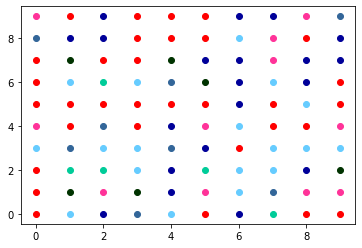

In [6]:
import numpy as np
import matplotlib.pyplot as plt

class SOMmp:
    def __init__(self, nrOutputNodes, nrFetures, data, nrSamples, stepSize):
        self.weights = np.random.random((nrOutputNodes,nrOutputNodes,nrFetures)) # 10st 10x31 matriser
        self.data = data
        self.nrOutputNodes = nrOutputNodes
        self.nrSamples = nrSamples
        self.stepSize = stepSize

    def findMostSimularNode(self, sample):
        distances = np.zeros(self.nrOutputNodes*self.nrOutputNodes)
        
        for i in range(self.nrOutputNodes):
            for j in range(self.nrOutputNodes):
                difference = sample - self.weights[i][j]
                distances[i*10 + j] = np.sum(np.abs(differences))
        
        winnerNode = distances.argmin()
        # [i] ger i:te klustret, [j] ger j:te raden inuti i:te klustret
        return winnerNode

    def updateWeights(self, sample, winnerNode, neighbourhood):
        start_i = max(winnerNode[0] - neighbourhood,0)
        start_j = max(winnerNode[1] - neighbourhood,0)
        end_i = min(winnerNode[0] + neighbourhood,self.nrOutputNodes)
        end_j = min(winnerNode[1] + neighbourhood,self.nrOutputNodes)
        
        for i in range(start_i, end_i):
            for j in range(end_j,end_j):
                deltaW = sample - self.weights[i][j]
                self.weights[i][j] = self.weights[i][j] + (0.2*deltaW)

    def run(self, neighbourhood):
        pos = np.zeros(self.nrSamples)
        new_pos = np.zeros((self.nrSamples,2))
        count = 0
        
        for sample in self.data:
            winNode = self.findMostSimularNode(sample) # index
            pos[count] = winNode
            count = count + 1
            if winNode < 10:
                winnerNode = [0, winNode]
            else:
                strWinNode = str(winNode)
                winnerNode = [int(strWinNode[0]),int(strWinNode[1])]
            
            self.updateWeights(sample, winnerNode, neighbourhood)
            
        return pos
    
# Coding: 0=no party, 1='m', 2='fp', 3='s', 4='v', 5='mp', 6='kd', 7='c'
# Use some color scheme for these different groups
# Coding: Male 0, Female 1

def readVotes(array):
    arr = np.copy(array)
    
    with open('votes.dat','r') as f:
        MP_file = f.readlines()
        MP_file = [x.strip() for x in MP_file]
        MP_votes = MP_file[0].split(',')
        
    for MP in range(arr.shape[0]):
        for vote in range(arr.shape[1]):
            arr[MP][vote] = MP_votes[MP+vote]

    return arr

def readList(MP, path):
    arr = np.zeros(MP)
    
    with open(path,'r') as f:
        attribute_file = f.readlines()
        attribute_file = [x.strip() for x in attribute_file]        
        
    for i in range(len(arr)):
        arr[i] = int(attribute_file[i])
        
    return arr

def plotParty(mp_party,selfOrgMap,mp_votes):
    mpParty_sorted = np.zeros(len(mp_party))
#     sorted_indices = np.argsort(organizedMap)

#     for k in range(len(mp_party)):
#         mpParty_sorted[k] = mp_party[sorted_indices[k]]
    
    for i in range(10):
        for j in range(10):
            # find closest input to weight
            shortestDistance = 1000000000
            voteIndex = -1
            for k in range(349):
                difference = np.subtract(mp_votes[k], selfOrgMap.weights[i][j])
                distanceTemp = np.dot(difference.T, difference)
                if shortestDistance > distanceTemp:
                    shortestDistance = distanceTemp
                    voteIndex = k
                    
            if mp_party[voteIndex] == 1:
                plt.plot(i, j, color='#000099', marker='o', label='m')
            elif mp_party[voteIndex] == 2:
                plt.plot(i, j, color='#66ccff', marker='o', label='fp')
            elif mp_party[voteIndex] == 3:
                plt.plot(i, j, color='#ff0000', marker='o', label='s')
            elif mp_party[voteIndex] == 4:
                plt.plot(i, j, color='#ff3399', marker='o', label='v')
            elif mp_party[voteIndex] == 5:
                plt.plot(i, j, color='#003300', marker='o', label='mp')
            elif mp_party[voteIndex] == 6:
                plt.plot(i, j, color='#336699', marker='o', label='kd')
            elif mp_party[voteIndex] == 7:
                plt.plot(i, j, color='#00cc99', marker='o', label='c')
            else:
                plt.plot(i, j, color='#000000', marker='o', label='no party')
    plt.show()
            
            
    
def topologyOrderingCities():
    outputNodesDim = 10
    features = 31
    MP = 349

    props = np.zeros((MP,features))
    props = readVotes(props)
    
    selfOrgMap = SOMmp(outputNodesDim, features, props, MP, 0.2)
    
    epochs = 20
    startNeighbours = 8
    for epoch in range(epochs):
        nrNeighbours = round((startNeighbours - (epoch * startNeighbours/ (epochs-1)))/2)
        organizedMap = selfOrgMap.run(nrNeighbours)
    
    print(organizedMap)
    path = 'mpparty.dat'
    mpData = readList(MP,path)
    plotParty(mpData,selfOrgMap,props)
    
topologyOrderingCities()